# 홈플러스 밀키트 상품 top20 리뷰 분석

#### 필요한 라이브러리 설치

In [ ]:
# 필요한 라이브러리 설치
!pip install wordcloud
!pip install matplotlib
!pip install konlpy

# 한글 폰트 설치 (예: 나눔고딕)
!apt-get install -y fonts-nanum
!fc-cache -fv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 32.1 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (36.0 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124561 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs


In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 39.0 MB/s eta 0:00:00


In [ ]:

# 런타임 재시작
import os
os.kill(os.getpid(), 9)

## 데이터 불러오기

In [ ]:
import pandas as pd
import sqlite3
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import koreanize_matplotlib

ModuleNotFoundError: No module named 'konlpy'

In [ ]:
import seaborn as sns

In [ ]:
import duckdb

#conn = duckdb.connect('/content/homeplus_review_top20.db') # colab서서
conn = duckdb.connect('C:/Users/eunju/Downloads/homeplus_review_top20.db') #local pc서서

# 쿼리 실행
query = "SELECT * FROM homeplus_review_top20.main.reviews"

df = conn.execute(query).fetchdf()
conn.close()

In [ ]:
df.head()

,blockYn,brandNm,chgDt,contents,grade,gradeAccuracy,gradeNm,gradePrice,gradeStatus,imageList,...,satis2Option,satis2No,satis3AnswerText,satis3AnswerValue,satis3Option,satis3No,dcateCd,imgChgDt,imgType,imgTypeNm
0,N,NaN,2025-01-13 20:33:53,의정부부대찌개 맛있어요,5.0,0,VIP+,0,0,[{'imgUrl': '/us/af3d4cb7-751b-44b7-b1cd-cac9e...,...,3.0,2.0,쉬워요,조리난이도,3.0,9.0,NaN,20240813171052,ETC,기타
1,N,NaN,2025-01-13 19:58:41,맛있게 잘먹었습니다.편해요.,5.0,0,Gold+,0,0,[{'imgUrl': '/us/121022b3-fc14-4cb8-b797-f09c9...,...,3.0,2.0,쉬워요,조리난이도,3.0,9.0,NaN,20240813171052,ETC,기타
2,N,NaN,2025-01-13 18:03:28,육수가 들어있어서 다른 밀키트들에 비해 맛있어요. \n 사리면도 함께 있어서 따로...,5.0,0,Silver+,0,0,[],...,3.0,2.0,쉬워요,조리난이도,3.0,9.0,NaN,20240813171052,ETC,기타
3,N,NaN,2025-01-13 17:22:45,진한 사골 육수가 들어 있는 부대찌개를 맛나게 끓이고 있다. 양이 많아서 두 번으로...,5.0,0,Family+,0,0,[{'imgUrl': '/us/24af3a1b-d0ee-45e5-bb5e-1b2cc...,...,2.0,2.0,보통이에요,조리난이도,2.0,9.0,NaN,20240813171052,ETC,기타
4,N,NaN,2025-01-13 17:12:05,None,5.0,0,Silver+,0,0,[],...,3.0,2.0,쉬워요,조리난이도,3.0,9.0,NaN,20240813171052,ETC,기타


## 데이터 정제

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46473 entries, 0 to 46472
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   blockYn                        46473 non-null  object 
 1   brandNm                        0 non-null      float64
 2   chgDt                          46473 non-null  object 
 3   contents                       44407 non-null  object 
 4   grade                          46473 non-null  float64
 5   gradeAccuracy                  46473 non-null  int64  
 6   gradeNm                        46346 non-null  object 
 7   gradePrice                     46473 non-null  int64  
 8   gradeStatus                    46473 non-null  int64  
 9   imageList                      46473 non-null  object 
 10  itemNm                         46473 non-null  object 
 11  itemNo                         46473 non-null  int64  
 12  regDt                          46473 non-null 

In [ ]:

df['chgDt'] = pd.to_datetime(df['chgDt'])


## 시계열 EDA

### 전체 리뷰 건수 파악

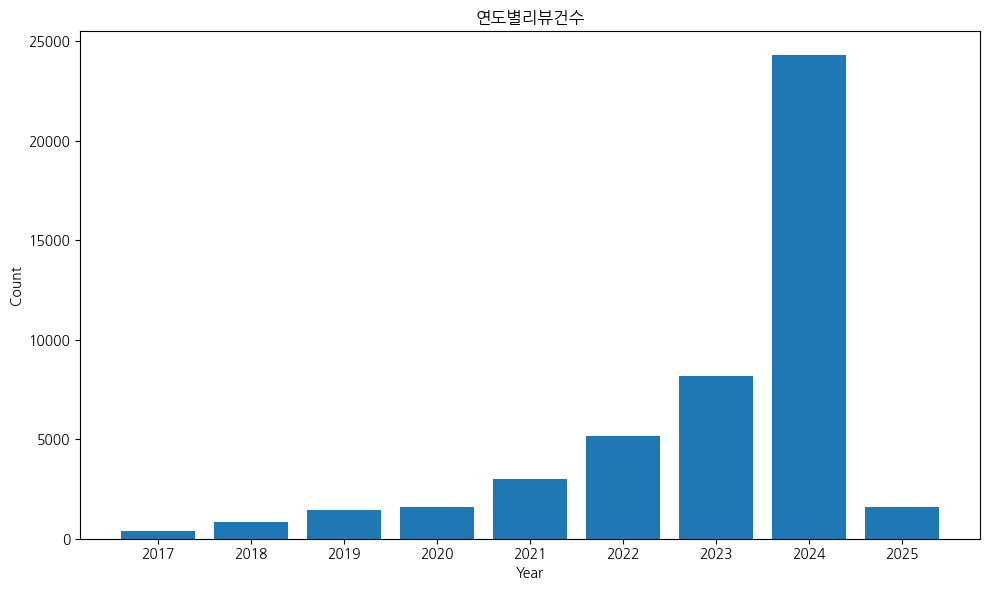

In [ ]:
yearly_counts = df.groupby(df['chgDt'].dt.year).size()


plt.figure(figsize=(10, 6))
plt.bar(yearly_counts.index, yearly_counts.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('연도별리뷰건수')
plt.xticks(yearly_counts.index)  # Ensure all years are displayed on the x-axis
plt.tight_layout()
plt.show()

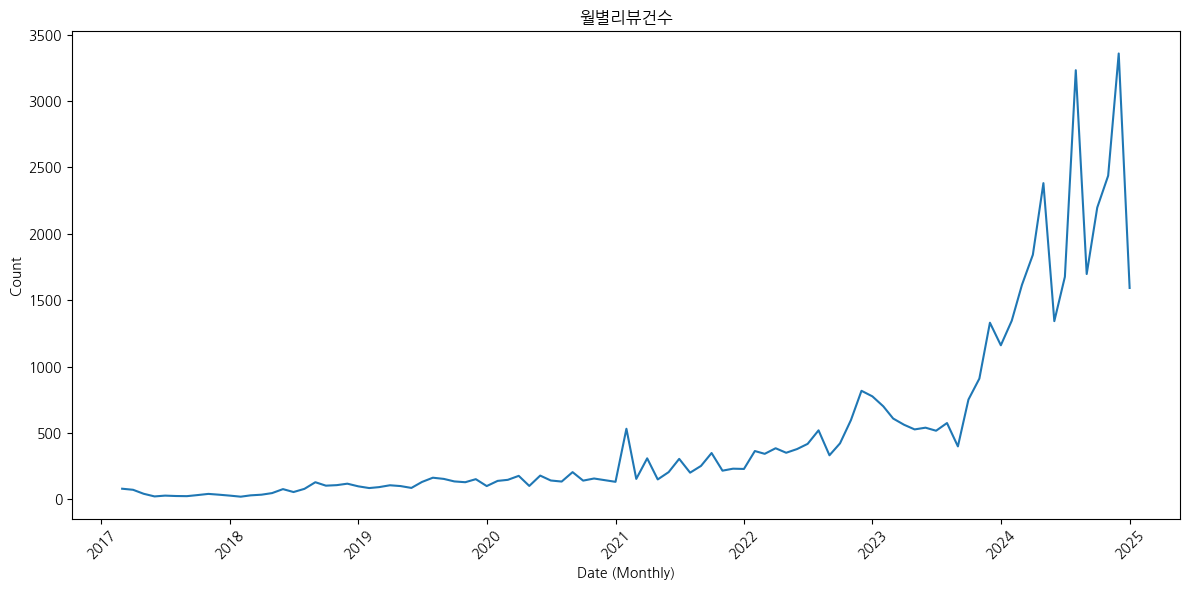

In [ ]:
# 월별 데이터 개수 계산
monthly_counts = df.groupby(df['chgDt'].dt.to_period('M')).size()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index.to_timestamp(), monthly_counts.values)
plt.xlabel('Date (Monthly)')
plt.ylabel('Count')
plt.title('월별리뷰건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 상품별 리뷰 건수 파악

In [ ]:
df_count = df.groupby(['itemNo', 'itemNm']).size().reset_index(name='count')
df_count

,itemNo,itemNm,count
0,68836278,[밀키트] 홈밀 감바스 알 아히요 420G,1142
1,69262839,[밀키트] 홈밀 이건 꼭 사야해 부대찌개 2.5KG,1847
2,69283215,[밀키트] 려강 국내산 사골육수 모둠 순대국 1.4KG,1659
3,69384205,하코야 오뎅전골 751G,836
4,69424545,하코야 김치카츠 나베 680G,1413
5,69739616,도드람 해남 묵은지 김치찌개 1KG,573
6,70143939,[밀키트] 밀푀유 나베 4인분 1129G,978
7,70157071,[밀키트] 홈밀 의정부식 부대찌개 750G,3853
8,70171145,달떡볶이 쫄깃 바삭 떡꼬치 330G,819
9,70177916,[밀키트] 얼큰 미나리 버섯샤브전골 835G,1066


### 상품별 리뷰건수 시계열 그래프

#### Daily

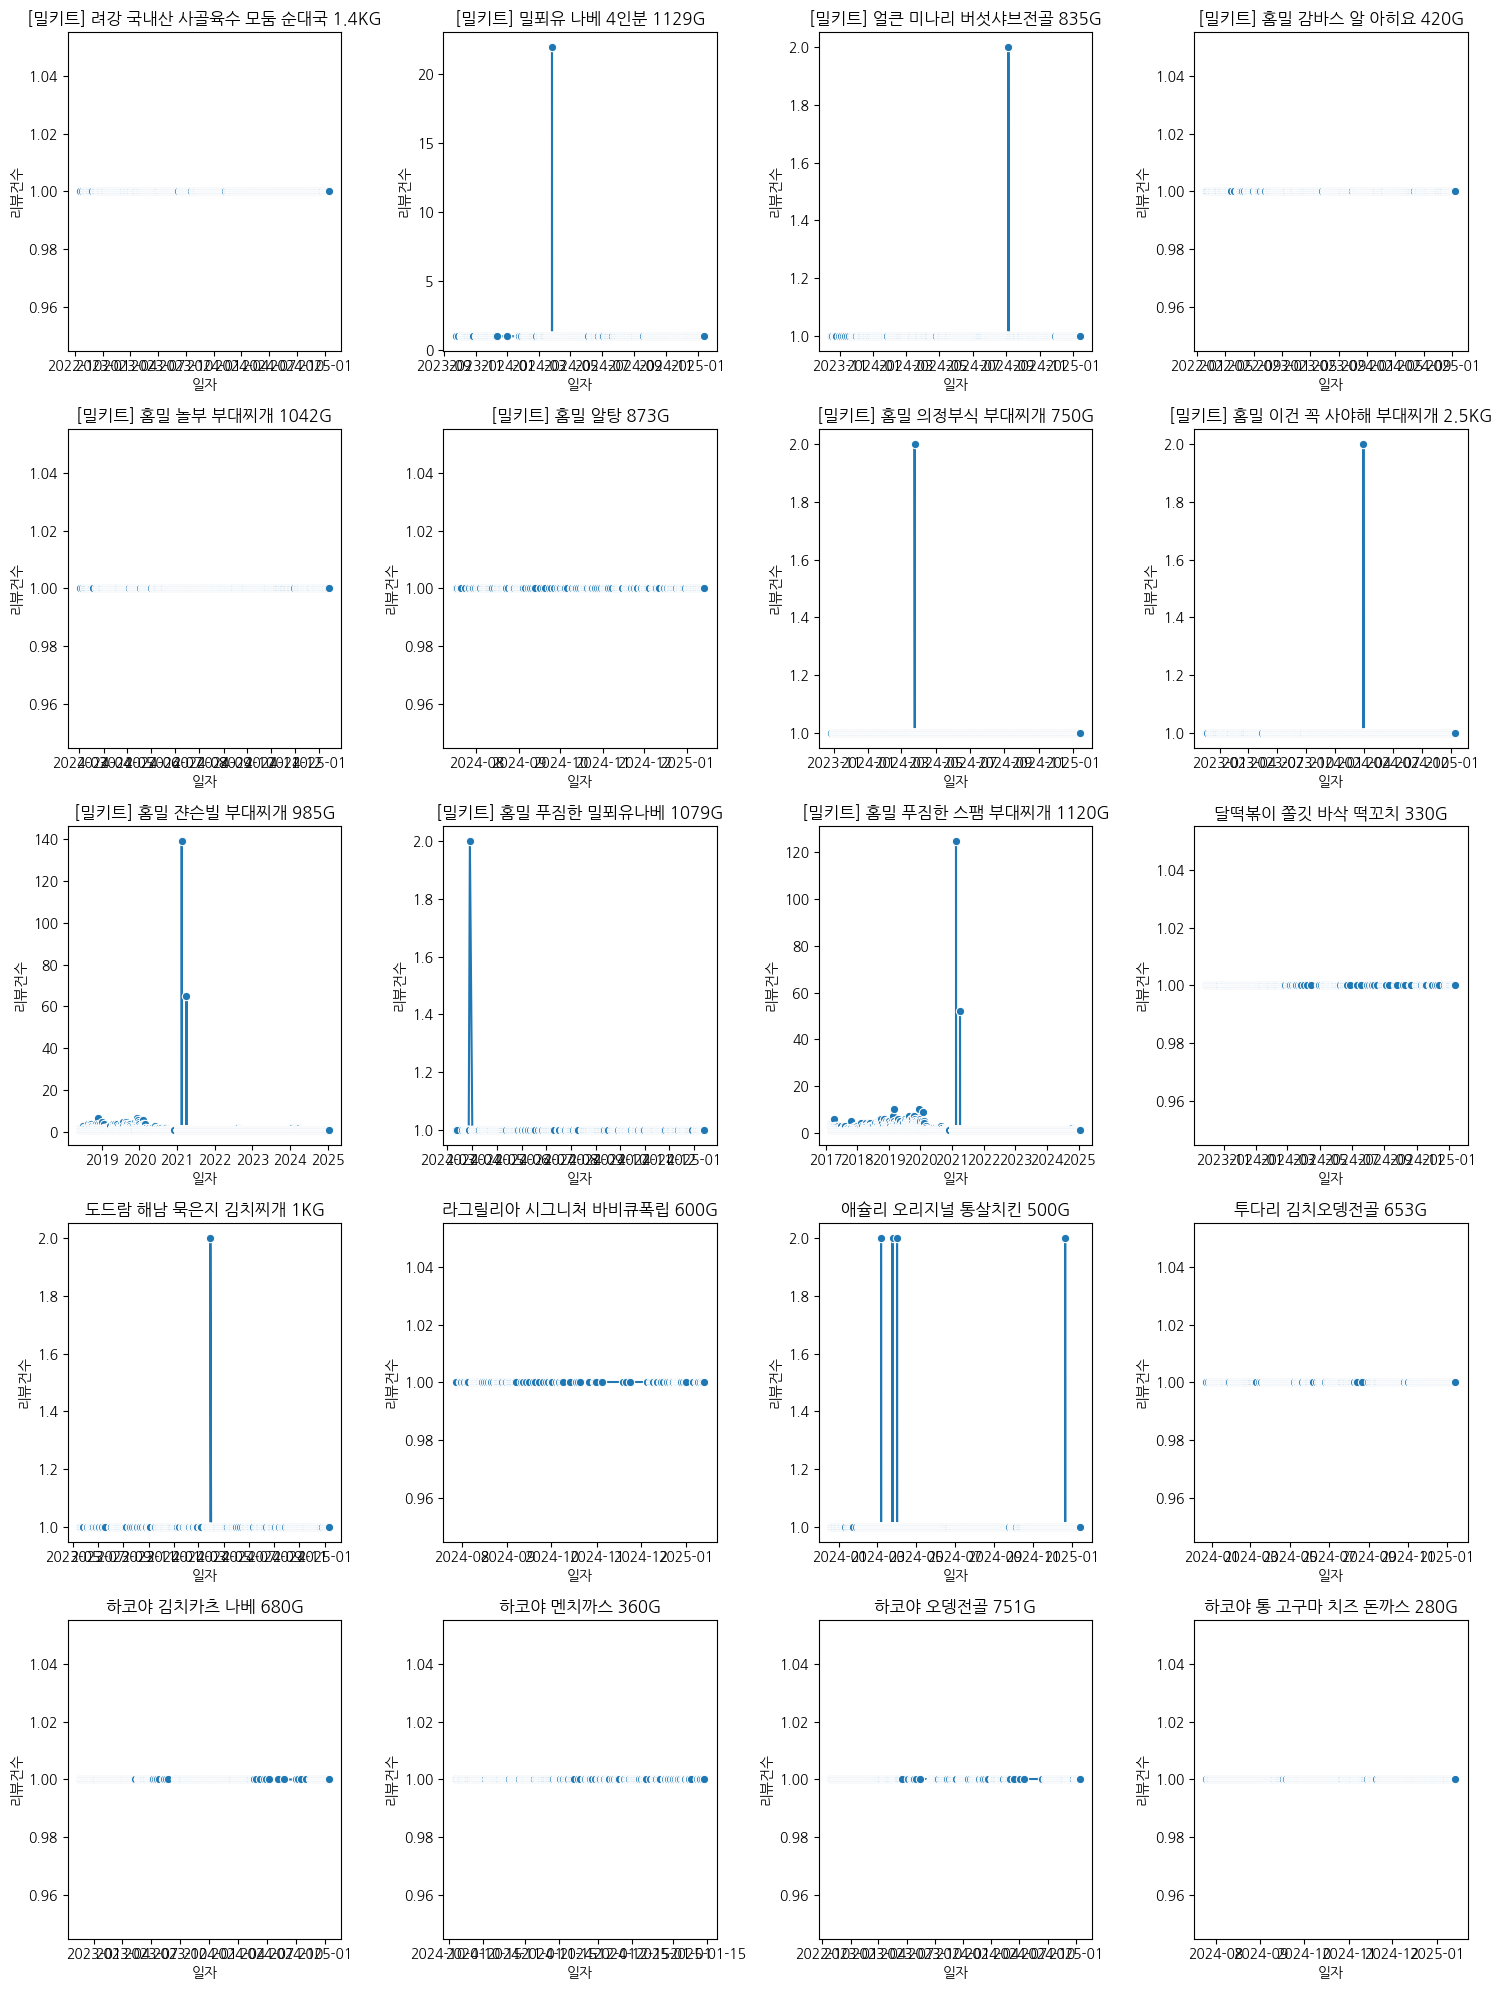

In [ ]:
# itemNm 별로 chgDt 일자별 리뷰 건수 계산
df_grouped = df.groupby(['itemNm', 'chgDt']).size().reset_index(name='리뷰건수')

# itemNm 리스트 추출
itemNm_list = df_grouped['itemNm'].unique()

# 그래프 그리기
plt.figure(figsize=(15, 20))  # 전체 그래프 크기 설정
for i, itemNm in enumerate(itemNm_list, 1):
    plt.subplot(5, 4, i)  # 5행 4열 서브플롯 (총 20개)
    item_data = df_grouped[df_grouped['itemNm'] == itemNm]
    sns.lineplot(x='chgDt', y='리뷰건수', data=item_data, marker='o')
    plt.title(itemNm)
    plt.xlabel('일자')
    plt.ylabel('리뷰건수')
    plt.tight_layout()  # 레이아웃 조정

plt.show()

#### Monthly

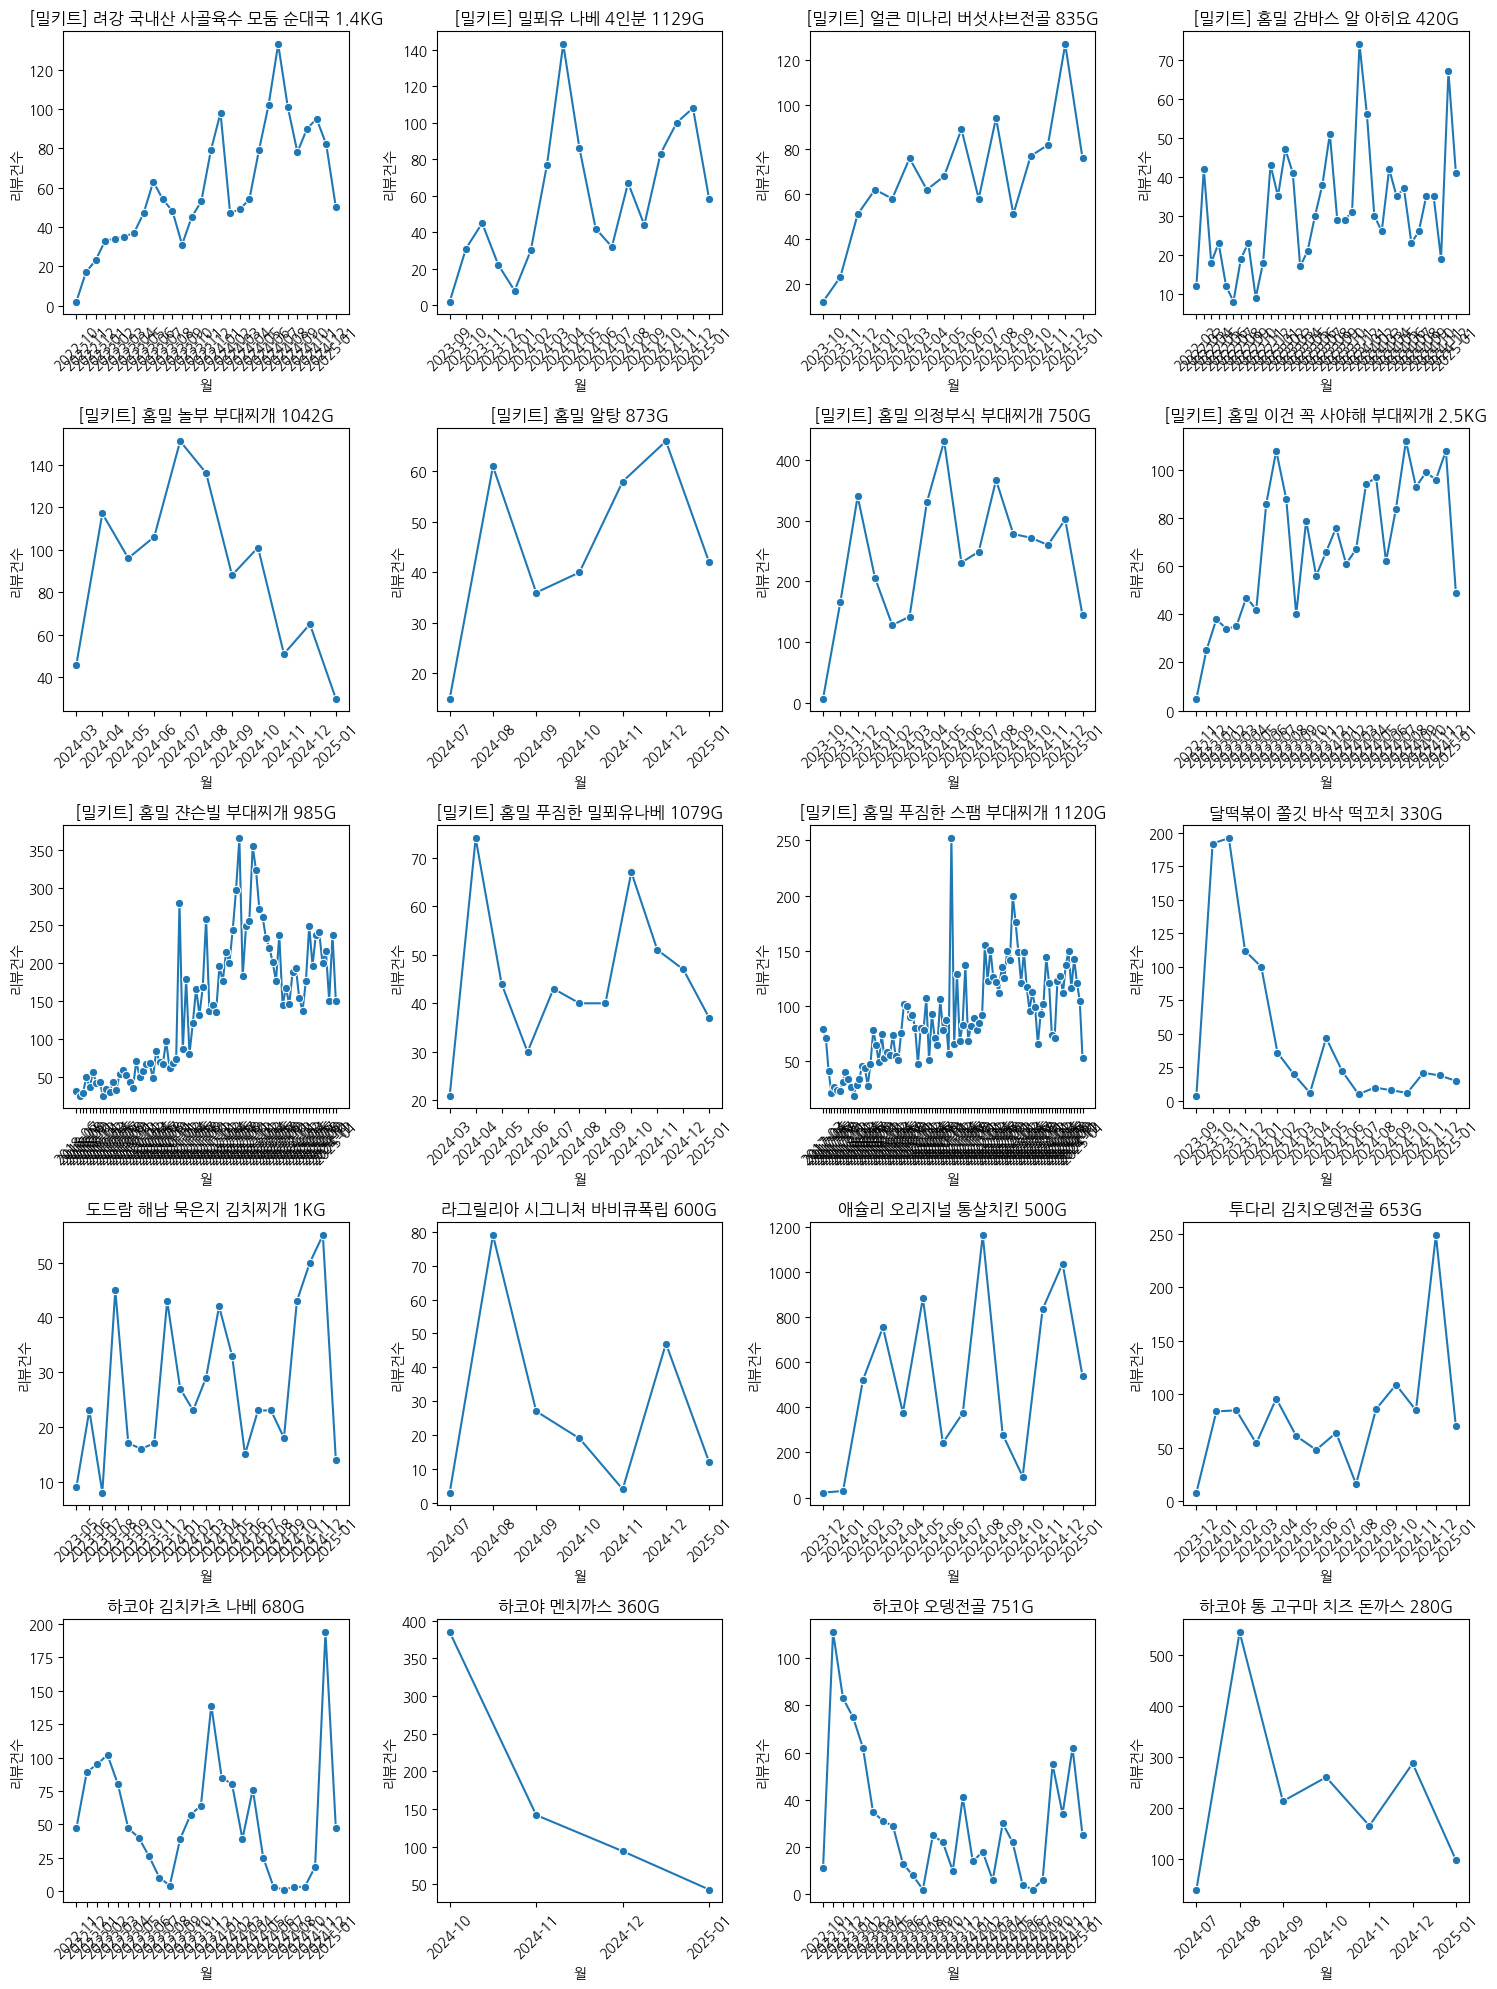

In [ ]:
# 월별로 데이터 집계
df['월'] = df['chgDt'].dt.to_period('M')  # 월 단위로 변환
df['월'] = df['월'].astype(str)  # Period 타입을 문자열로 변환
df_grouped = df.groupby(['itemNm', '월']).size().reset_index(name='리뷰건수')

# itemNm 리스트 추출
itemNm_list = df_grouped['itemNm'].unique()

# 그래프 그리기
plt.figure(figsize=(15, 20))  # 전체 그래프 크기 설정
for i, itemNm in enumerate(itemNm_list, 1):
    plt.subplot(5, 4, i)  # 5행 4열 서브플롯 (총 20개)
    item_data = df_grouped[df_grouped['itemNm'] == itemNm]
    sns.lineplot(x='월', y='리뷰건수', data=item_data, marker='o')
    plt.title(itemNm)
    plt.xlabel('월')
    plt.ylabel('리뷰건수')
    plt.xticks(rotation=45)  # x축 레이블 회전 (가독성 향상)
    plt.tight_layout()  # 레이아웃 조정

plt.show()

#### Yearly

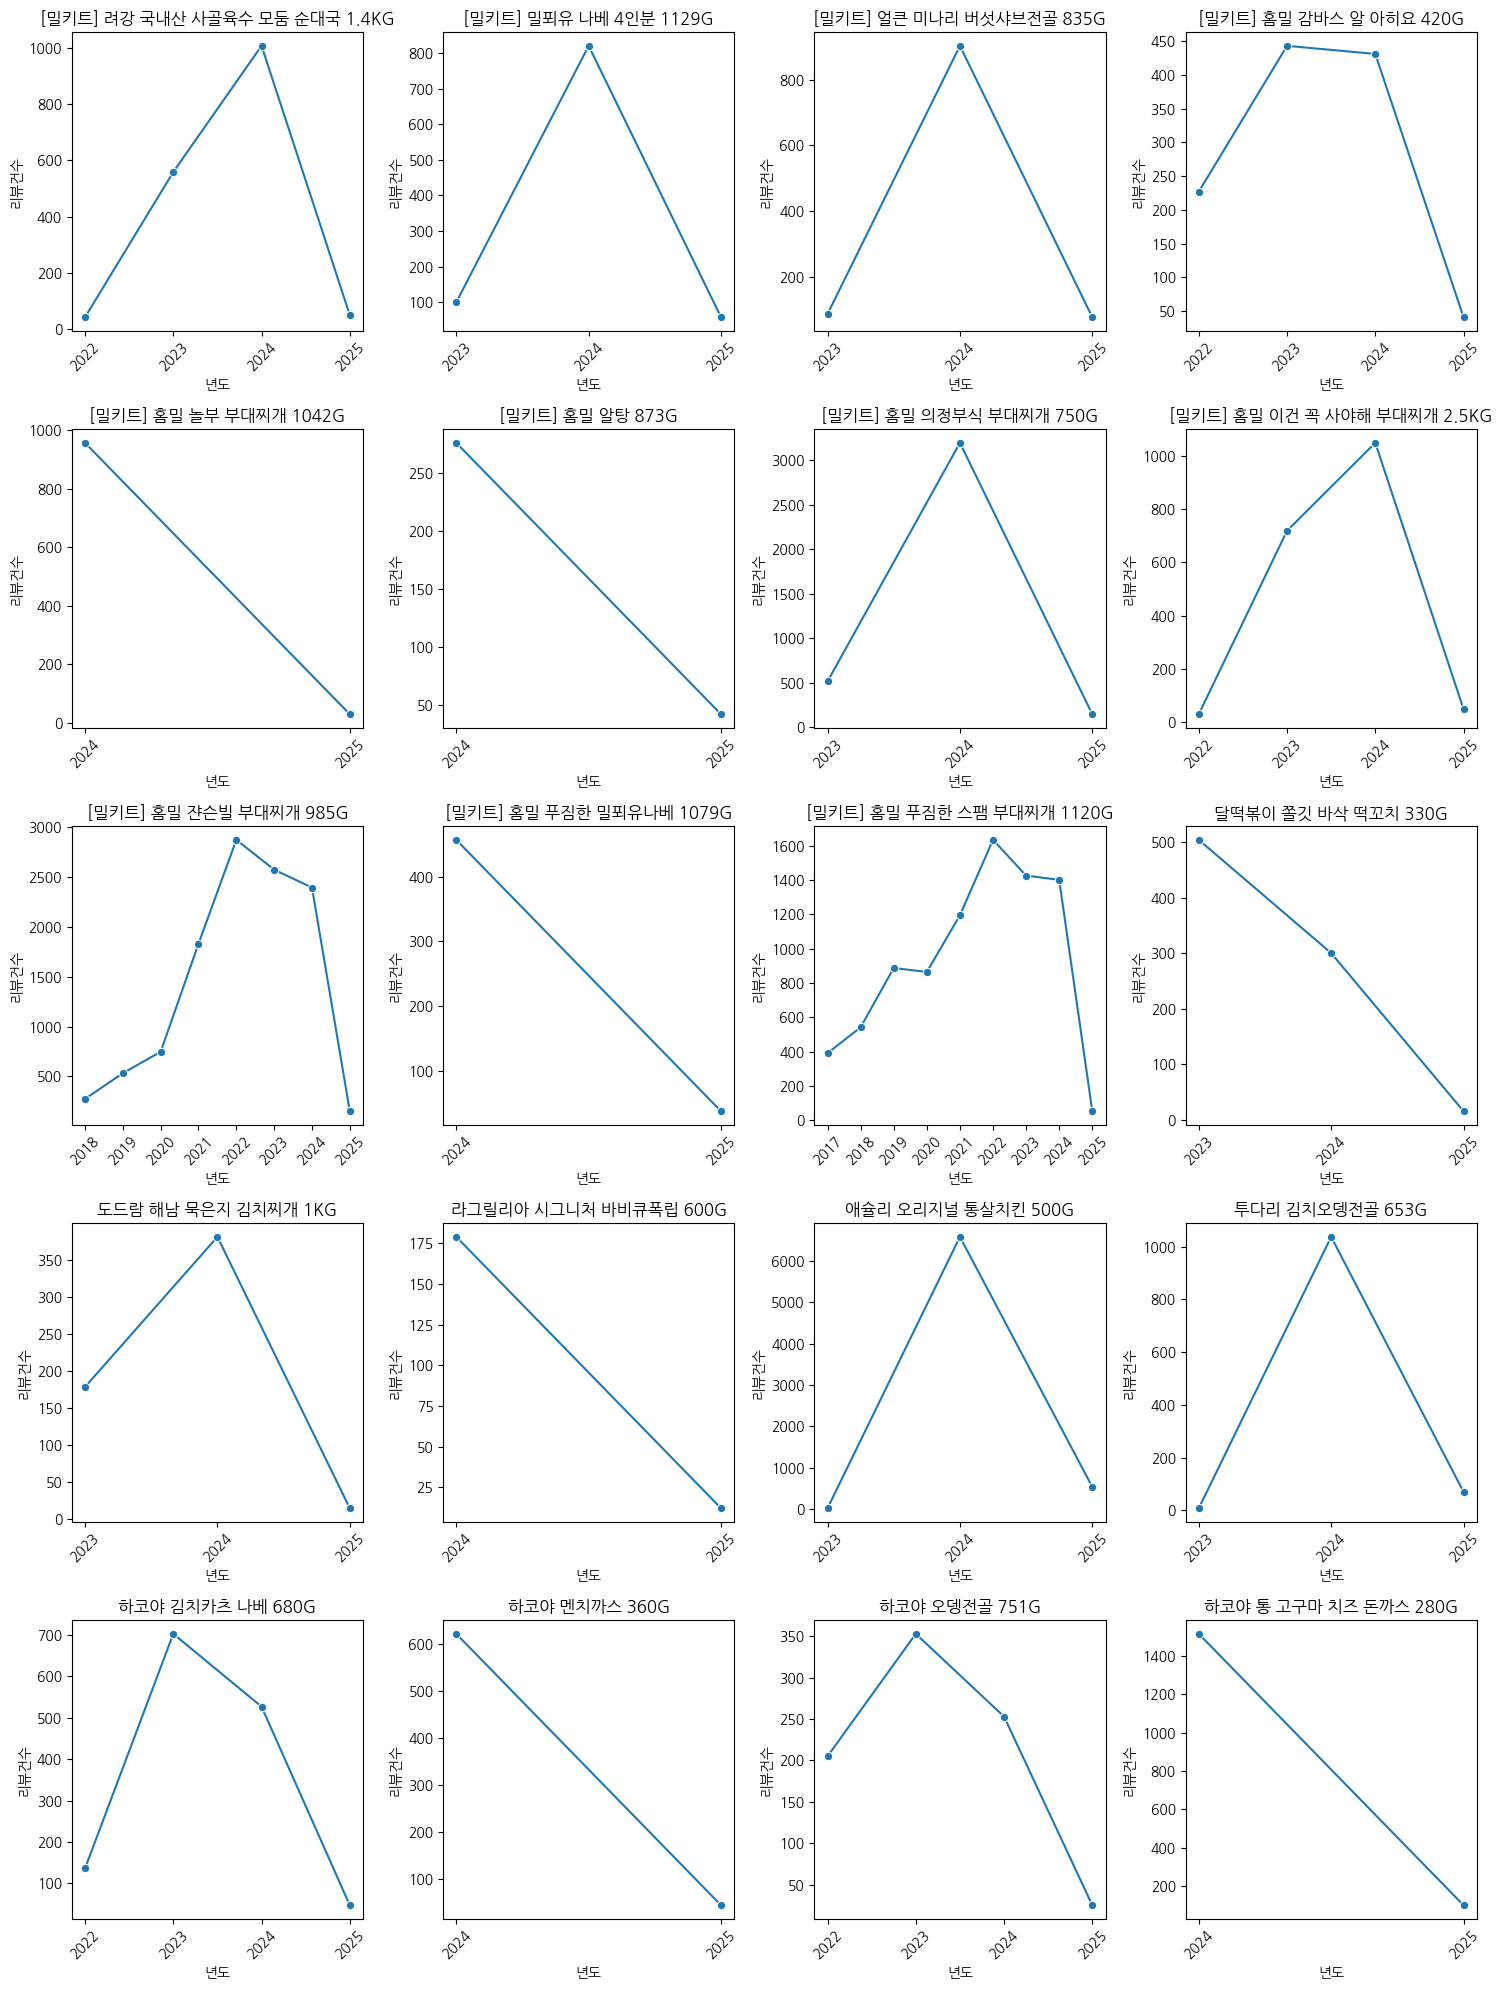

In [ ]:
# 연도별로 데이터 집계
df['년도'] = df['chgDt'].dt.to_period('Y')  # 연도 단위로 변환
df['년도'] = df['년도'].astype(str)  # Period 타입을 문자열로 변환
df_grouped = df.groupby(['itemNm', '년도']).size().reset_index(name='리뷰건수')

# itemNm 리스트 추출
itemNm_list = df_grouped['itemNm'].unique()

# 그래프 그리기
plt.figure(figsize=(15, 20))  # 전체 그래프 크기 설정
for i, itemNm in enumerate(itemNm_list, 1):
    plt.subplot(5, 4, i)  # 5행 4열 서브플롯 (총 20개)
    item_data = df_grouped[df_grouped['itemNm'] == itemNm]
    sns.lineplot(x='년도', y='리뷰건수', data=item_data, marker='o')
    plt.title(itemNm)
    plt.xlabel('년도')
    plt.ylabel('리뷰건수')
    plt.xticks(rotation=45)  # x축 레이블 회전 (가독성 향상)
    plt.tight_layout()  # 레이아웃 조정

plt.show()

## 텍스트 분석

### 전체 리뷰에 대한 워드클라우드

In [ ]:
!pip install JPype1

In [ ]:
# 한글 텍스트 분석을 위한 Okt (Open Korean Text) 초기화
jvm_path = "C:/Program Files/Java/jdk-11.0.1/bin/server/jvm.dll"
okt = Okt(jvmpath=jvm_path)


# 명사 추출 함수
def get_nouns(text):
    if pd.isna(text):  # NaN 값 처리
        return []
    nouns = okt.nouns(text)  # 명사 추출
    return [noun for noun in nouns if len(noun) > 1]  # 1글자 명사 제외

# 모든 리뷰에서 명사 추출
nouns_list = []
for review in df['contents']:
    nouns_list.extend(get_nouns(review))

# 단어 빈도수 계산
word_count = Counter(nouns_list)

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path = 'C:/Windows/Fonts/malgun.ttf' ,
    #font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',  # colab에서 한글 폰트 경로
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(word_count)

# 워드클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.title('리뷰 단어 빈도수 워드클라우드', fontsize=16)  # 한글 제목
plt.show()

OSError: [WinError 126] JVM DLL not found: C:/Program Files/Java/jdk-11.0.1/bin/server/jvm.dll

### 텍스트 클러스터링

In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 45.3 MB/s eta 0:00:00


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# 데이터 예시 (df가 이미 존재한다고 가정)
# df = pd.read_csv("/content/homeplus_reviews.csv")

# NaN 값 처리
df['contents'] = df['contents'].fillna('')  # NaN 값을 빈 문자열로 대체

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tfidf = vectorizer.fit_transform(df['contents'])

# LDA용 입력 데이터 준비
texts = df['contents'].apply(lambda x: x.split())  # 텍스트를 공백 기준으로 토큰화
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Gensim LDA 모델 학습
lda_gensim = LdaModel(corpus=corpus, num_topics=5, id2word=dictionary, random_state=42, passes=15)

# pyLDAvis 시각화
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_gensim, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.182537 -0.065432       1        1  23.549880
2     -0.030397 -0.241426       2        1  21.899591
0     -0.144810  0.213578       3        1  19.050646
3      0.083205  0.072978       4        1  18.350051
1      0.274539  0.020301       5        1  17.149831, topic_info=       Term         Freq        Total Category  logprob  loglift
0      맛있어요  4567.000000  4567.000000  Default  30.0000  30.0000
64      좋아요  5001.000000  5001.000000  Default  29.0000  29.0000
89        잘  3826.000000  3826.000000  Default  28.0000  28.0000
106    저렴하게  1501.000000  1501.000000  Default  27.0000  27.0000
97    감사합니다  1237.000000  1237.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
113      제품   225.083271   309.442909   Topic5  -5.2021   1.4449
86      가성비   257.518551   413.088107   Topic5  -5.0675   1.2906
176      ㅎㅎ   307.326960   636.958531   Topic5  -4.8906   1.0344
1787     아직   257.366542   477.593696   Topic5  -5.0681   1.1449
5388    1+1   166.530266   319.741853   Topic5  -5.5034   1.1108

[241 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
2007       4  0.989383     .
5388       1  0.275222   1+1
5388       2  0.203289   1+1
5388       5  0.522296   1+1
14239      1  0.996266    4개
...      ...       ...   ...
163        3  0.997787     햄
801        5  0.996284  행사가로
815        5  0.996906   행사로
108        5  0.998645  행사해서
233        5  0.996724  홈플러스

[267 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 4, 2])

### 텍스트 클러스터링 + 가중치

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# KMeans를 사용하여 4개의 군집으로 군집화
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10) # n_init 값을 증가시켜 안정성 확보
kmeans = kmeans.fit(tfidf) # tfidf는 이전 코드에서 계산된 tf-idf 값
df['cluster'] = kmeans.labels_

# 각 군집별로 tf-idf 값의 합계 계산 및 출력
for cluster_num in range(4):
    cluster_data = df[df['cluster'] == cluster_num]
    cluster_tfidf = tfidf[cluster_data.index]  # 해당 군집의 tf-idf 행렬 추출

    # tf-idf 합계 계산 (각 단어의 tf-idf 값 합산)
    tfidf_sum = np.array(cluster_tfidf.sum(axis=0)).flatten()

    # 단어-가중치 쌍 생성
    tfidf_weights = list(zip(vectorizer.get_feature_names_out(), tfidf_sum))

    # 가중치 기준 내림차순 정렬
    tfidf_weights.sort(key=lambda x: x[1], reverse=True)

    print(f"\nCluster {cluster_num}: Top 10 TF-IDF Values")
    for word, weight in tfidf_weights[:10]:
        print(f"{word}: {weight}")

C:\Users\eunju\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\eunju\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\eunju\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\eunju\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\eunju\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
 


Cluster 0: Top 10 TF-IDF Values
감사합니다: 985.9615867332705
자주: 721.5065250145467
저렴하게: 668.8555666151474
잘받았습니다: 587.8198376298337
만족합니다: 572.6420445735918
받았습니다: 540.8354278890306
맛있어서: 530.9762066031528
부대찌개: 517.9213867141351
배송: 434.71689154423774
너무: 433.37478704111

Cluster 1: Top 10 TF-IDF Values
맛있게: 722.8785129786228
먹었습니다: 316.1020396201803
먹었어요: 247.04898119953558
잘먹었습니다: 78.290329943681
잘먹었어요: 35.73528200997069
먹고: 34.15402820225119
좋아요: 28.34801974378713
감사합니다: 25.227123439195406
항상: 23.564691324611307
너무: 22.885185033478624

Cluster 2: Top 10 TF-IDF Values
맛있어요: 2237.9040563203757
부대찌개: 193.3900691108496
자주: 90.12831706001103
너무: 89.60649709371538
많고: 80.38706191796031
양도: 79.9492536236614
간편하고: 77.74030834766933
제일: 60.248375233965696
푸짐하고: 59.63818060329107
쟌슨빌: 59.63172920863945

Cluster 3: Top 10 TF-IDF Values
좋아요: 2523.18898163048
먹기: 205.25788867695005
맛있어요: 201.22228940879324
빠르고: 188.02849570904763
간편하게: 162.2121511322792
배송: 148.6994178151175
배송도: 132.031954877242

## 텍스트 긍부정 분석

In [ ]:

!pip install transformers
!pip install torch

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.7 MB 5.6 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.7 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.7 MB 15.4 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 15.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 34.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 2.4/203.0 MB 12.3 MB/s eta 0:00:17
   - -------------------------------------- 5.8/203.0 MB 16.0 MB/s eta 0:00:13
   - -------------------------------------- 10.0/203.0 MB 16.8 MB/s eta 0:00:12
   -- ------------------------------------- 13.6/203.0 MB 17.5 MB/s eta 0:00:11
   -- ------------------------------------- 14.9/203.0 MB 15.2 MB/s eta 0:00:13
   --- --

from transformers import pipeline
from tqdm import tqdm

def analyze_sentiment(df):

    # 감성 분석을 위한 파이프라인 설정
    classifier = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')
    
    # 결과를 저장할 리스트 초기화
    sentiment_scores = []
    
    # tqdm으로 진행률 표시하며 각 텍스트에 대해 감성 분석 수행
    for text in tqdm(df['contents']):
        try:
            # 감성 분석 수행
            result = classifier(text)
            # 결과값을 0~1 사이로 정규화 (1에 가까울수록 긍정)
            score = float(result[0]['score'])
            sentiment_scores.append(score)
        except Exception as e:
            # 에러 발생 시 중립값(0.5) 할당
            sentiment_scores.append(0.5)
            print(f"Error processing text: {e}")
    
    # 결과를 데이터프레임에 추가
    df['senti_grade'] = sentiment_scores
    
    return df

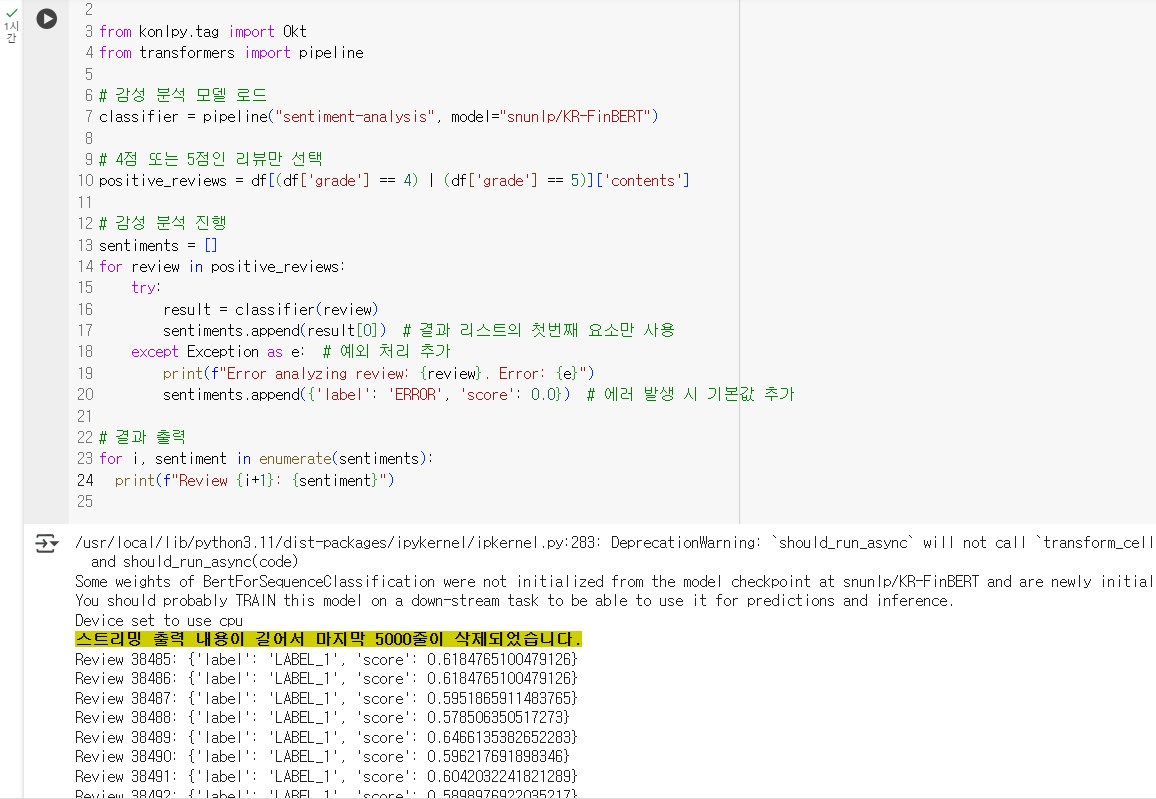

-> 다시 돌려보기

In [ ]:
import os
os.environ['HF_HUB_DISABLE_SYMLINKS_WARNING'] = '1'
df = analyze_sentiment(df)

Device set to use cpu
100%|████████████████████████████████████████████████████████████████████████████| 46473/46473 [47:25<00:00, 16.33it/s]


In [ ]:
df.tail()

,blockYn,brandNm,chgDt,contents,grade,gradeAccuracy,gradeNm,gradePrice,gradeStatus,imageList,...,satis3Option,satis3No,dcateCd,imgChgDt,imgType,imgTypeNm,월,년도,cluster,senti_grade
46468,N,NaN,2023-12-29 22:45:29,연말에 투다리가 아닌 집에서 술안주용으로 구매\n1+1 행사하길래 고민 없이 주문완료,5.0,5,Family+,5,5,[{'imgUrl': /us/2852645b-a3ec-442f-bf1d-89e6e3...,...,NaN,NaN,NaN,20231123081450,ETC,기타,2023-12,2023,0,0.329263
46469,N,NaN,2023-12-29 13:17:17,상품을 개봉해보니 이구성이 맞나 싶을 정도로 부실하네요. 김치만 두개 들어있어요. ...,1.0,5,Gold+,1,1,[{'imgUrl': /us/19613b9f-44a8-44fd-946a-e6f50d...,...,NaN,NaN,NaN,20231123081450,ETC,기타,2023-12,2023,0,0.430980
46470,N,NaN,2023-12-28 18:06:40,빠른 배송 만족하고 친절해요,5.0,5,Silver+,5,5,[],...,NaN,NaN,NaN,20231123081450,ETC,기타,2023-12,2023,0,0.290235
46471,N,NaN,2023-12-26 16:56:01,양에 비해 가격이 사악하네요...넘 비싸요~~~ㅠㅠ,4.0,5,VIP+,3,5,[{'imgUrl': /us/4a565053-c533-4045-b6aa-443787...,...,NaN,NaN,NaN,20231123081450,ETC,기타,2023-12,2023,0,0.525517
46472,N,NaN,2023-12-23 15:58:36,간편하게 한 끼 식사를 즐길 수 있어서 좋아요,5.0,5,Silver+,5,5,[],...,NaN,NaN,NaN,20231123081450,ETC,기타,2023-12,2023,3,0.514622


In [ ]:
df.to_csv('homeplus_review_sentigrade.csv', index=False, encoding='utf-8-sig')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/개인/데이터분석_학습/패캠_inner circle/homeplus_review_sentigrade.csv', encoding='utf-8-sig')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-39-f62c9377e2a6>:1: DtypeWarning: Columns (29,30,33,34,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/개인/데이터분석_학습/패캠_inner circle/homeplus_review_sentigrade.csv', encoding='utf-8-sig')


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


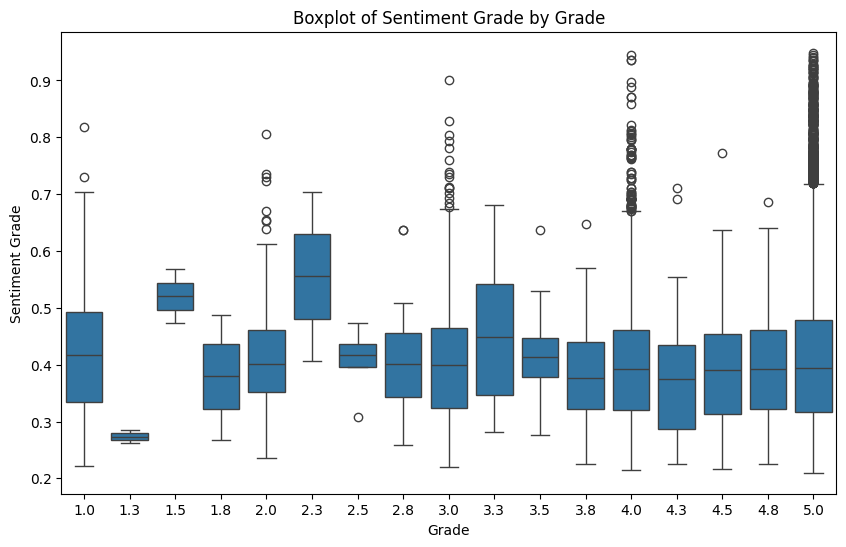

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='senti_grade', data=df)
plt.title('Boxplot of Sentiment Grade by Grade')
plt.xlabel('Grade')
plt.ylabel('Sentiment Grade')
plt.show()

In [ ]:
correlation = df['grade'].corr(df['senti_grade'])
print(f"The correlation between 'grade' and 'senti_grade' is: {correlation}")

The correlation between 'grade' and 'senti_grade' is: 0.004775275424887965


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
filtered_df = df[(df['senti_grade'] < 0.3) & (df['grade'] >= 4.8)]

result_df = filtered_df[['contents', 'itemNm', 'grade', 'senti_grade', 'itemNo']]
result_df

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,contents,itemNm,grade,senti_grade,itemNo
0,의정부부대찌개 맛있어요,[밀키트] 홈밀 의정부식 부대찌개 750G,5.0,0.291752,70157071
4,NaN,[밀키트] 홈밀 의정부식 부대찌개 750G,5.0,0.284615,70157071
5,맛있어서 종종 주문합니다,[밀키트] 홈밀 의정부식 부대찌개 750G,5.0,0.255910,70157071
7,홈플 배송덕에 편하게 맛있게 먹고있어요,[밀키트] 홈밀 의정부식 부대찌개 750G,5.0,0.261497,70157071
11,너무 좋아서 또 구매해야겟네요,[밀키트] 홈밀 의정부식 부대찌개 750G,5.0,0.294824,70157071
...,...,...,...,...,...
46438,맛있어요 소주를 부르는맛,투다리 김치오뎅전골 653G,5.0,0.255882,70305576
46439,얼큰한 투다리 김치오뎅전골~~~,투다리 김치오뎅전골 653G,5.0,0.234792,70305576
46445,오뎅전골 맛있어요~~,투다리 김치오뎅전골 653G,5.0,0.235617,70305576
46450,1+1 이라서 잘 구매한것 같습니다,투다리 김치오뎅전골 653G,5.0,0.274835,70305576


#### 여기까지 허깅페이스 bert모델 senti 파악한 것

#### 아래부터는 sklearn으로

In [ ]:
low_senti_high_grade

,blockYn,brandNm,chgDt,contents,grade,gradeAccuracy,gradeNm,gradePrice,gradeStatus,imageList,...,satis3Option,satis3No,dcateCd,imgChgDt,imgType,imgTypeNm,월,년도,cluster,senti_grade


In [ ]:

import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Assuming 'df' is your DataFrame and already loaded
# ... (your existing code to load the dataframe)

def analyze_sentiment(df):
    okt = Okt()

    def preprocess_text(text):
        if pd.isna(text) or not isinstance(text, str):  # Handle missing or non-string values
          return ""
        tokens = okt.morphs(text)
        return " ".join(tokens)

    df['processed_contents'] = df['contents'].apply(preprocess_text)

    # TF-IDF vectorization
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['processed_contents'])

    # Train a sentiment classifier (you can use other models here)
    # Use a sample set where 'grade' is available for training
    # Replace with your actual sentiment labels if you have them
    train_df = df[~df['grade'].isna()] # Filter out rows with NaN values in 'grade'
    y_train = (train_df['grade'] > 4.5).astype(int)  # Example sentiment classification
    model = LogisticRegression()
    model.fit(X[train_df.index], y_train) #Fit only for the training data

    # Predict sentiment scores on the entire data
    senti_scores = model.predict_proba(X)[:, 1]  # Probability of positive sentiment
    df['senti_grade'] = senti_scores

    return df


# Filter for itemNo 70157071
filtered_df = df[df['itemNo'] == 70157071]

# Apply sentiment analysis to the filtered data
filtered_df = analyze_sentiment(filtered_df)

# Print or further process the results
print(filtered_df[['contents', 'senti_grade']])

                                               contents  senti_grade
0                                          의정부부대찌개 맛있어요     0.935269
1                                       맛있게 잘먹었습니다.편해요.     0.843632
2      육수가 들어있어서 다른 밀키트들에 비해 맛있어요. \n 사리면도 함께 있어서 따로...     0.920866
3     진한 사골 육수가 들어 있는 부대찌개를 맛나게 끓이고 있다. 양이 많아서 두 번으로...     0.873239
4                                                   NaN     0.837873
...                                                 ...          ...
3848                                   가격 적당해서 자주 구입합니다     0.906793
3849                                       맛있어요 아주 좋습니다     0.966535
3850                                 먹어보니 맛있어서 재구매한거에요.     0.894142
3851                                       상품 배송 만족합니다~     0.719327
3852                             부대찌개 맛있어요\n이것만 먹어요~~^^     0.898354

[3853 rows x 2 columns]


<ipython-input-19-036230239175>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_contents'] = df['contents'].apply(preprocess_text)
<ipython-input-19-036230239175>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['senti_grade'] = senti_scores


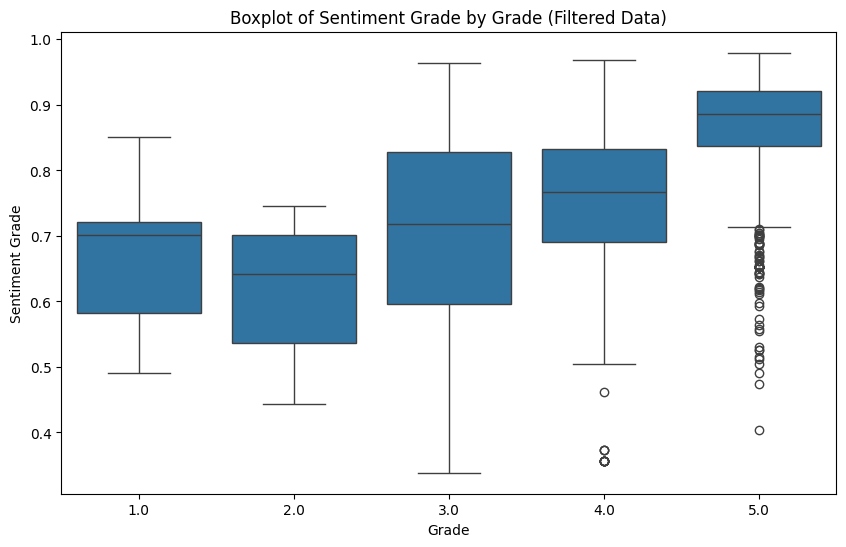

In [ ]:
# prompt: filtered_df의 grade컬럼을 x축 senti_grade를 y축에 놓고 box plot 그리기

plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='senti_grade', data=filtered_df)
plt.title('Boxplot of Sentiment Grade by Grade (Filtered Data)')
plt.xlabel('Grade')
plt.ylabel('Sentiment Grade')
plt.show()

In [ ]:
!pip install pyLDAvis==3.3.1

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis



In [ ]:
!pip install pyLDAvis.sklearn

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ERROR: Could not find a version that satisfies the requirement pyLDAvis.sklearn (from versions: none)
ERROR: No matching distribution found for pyLDAvis.sklearn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re

def preprocess_korean_text(text):
    # 특수문자 제거
    text = re.sub(r'[^가-힣\s]', '', str(text))
    return text

def prepare_data_for_topic_modeling(df, text_column):
    # 텍스트 전처리
    processed_texts = df[text_column].apply(preprocess_korean_text)

    # 한국어 불용어 정의
    stop_words = ['은', '는', '이', '가', '을', '를', '으로', '로', '의', '에', '도',
                 '만', '것', '등', '들', '네요', '아요', '어요', '나요', '군요',
                 '네', '요', '음', '였', '였다', '였음', '임', '있다', '없다']

    # CountVectorizer 적용
    vectorizer = CountVectorizer(max_features=1000,
                               stop_words=stop_words,
                               max_df=0.5,
                               min_df=2)

    doc_term_matrix = vectorizer.fit_transform(processed_texts)
    return vectorizer, doc_term_matrix

def perform_topic_modeling(doc_term_matrix, n_topics=5):
    # LDA 모델 학습
    lda = LatentDirichletAllocation(n_components=n_topics,
                                   random_state=42,
                                   max_iter=20,
                                   learning_method='batch')

    lda_output = lda.fit_transform(doc_term_matrix)
    return lda, lda_output

def print_topics(model, feature_names, n_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]]
        topics.append(f"Topic {topic_idx + 1}: {', '.join(top_words)}")
    return topics

# 데이터 분리
print("데이터 분리 중...")
low_ratings = filtered_df[filtered_df['grade'].isin([1, 2])]
high_ratings = filtered_df[filtered_df['grade'].isin([4, 5])]

print(f"낮은 평점 리뷰 수: {len(low_ratings)}")
print(f"높은 평점 리뷰 수: {len(high_ratings)}")

# 낮은 평점 토픽 모델링
print("\n=== 낮은 평점(1-2점) 리뷰 토픽 모델링 ===")
vectorizer_low, dtm_low = prepare_data_for_topic_modeling(low_ratings, 'contents')
lda_low, lda_output_low = perform_topic_modeling(dtm_low)

# 높은 평점 토픽 모델링
print("\n=== 높은 평점(4-5점) 리뷰 토픽 모델링 ===")
vectorizer_high, dtm_high = prepare_data_for_topic_modeling(high_ratings, 'contents')
lda_high, lda_output_high = perform_topic_modeling(dtm_high)

# 토픽 결과 출력
print("\n=== 낮은 평점 토픽 ===")
low_topics = print_topics(lda_low, vectorizer_low.get_feature_names_out())
for topic in low_topics:
    print(topic)

print("\n=== 높은 평점 토픽 ===")
high_topics = print_topics(lda_high, vectorizer_high.get_feature_names_out())
for topic in high_topics:
    print(topic)

# 토픽 분포 계산
def get_dominant_topics(lda_output):
    dominant_topics = np.argmax(lda_output, axis=1)
    topic_counts = pd.Series(dominant_topics).value_counts(normalize=True)
    return topic_counts

print("\n=== 낮은 평점 토픽 분포(%) ===")
low_topic_dist = get_dominant_topics(lda_output_low)
print(low_topic_dist * 100)

print("\n=== 높은 평점 토픽 분포(%) ===")
high_topic_dist = get_dominant_topics(lda_output_high)
print(high_topic_dist * 100)

# 토픽별 대표 문서 출력
def print_representative_docs(df, lda_output, n_docs=2):
    for topic_idx in range(lda_output.shape[1]):
        topic_scores = lda_output[:, topic_idx]
        top_doc_indices = topic_scores.argsort()[-n_docs:][::-1]

        print(f"\nTopic {topic_idx + 1} 대표 리뷰:")
        for idx in top_doc_indices:
            print(f"- {df['contents'].iloc[idx][:100]}...")  # 처음 100자만 출력

print("\n=== 낮은 평점 토픽별 대표 리뷰 ===")
print_representative_docs(low_ratings, lda_output_low)

print("\n=== 높은 평점 토픽별 대표 리뷰 ===")
print_representative_docs(high_ratings, lda_output_high)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


데이터 분리 중...
낮은 평점 리뷰 수: 30
높은 평점 리뷰 수: 3693

=== 낮은 평점(1-2점) 리뷰 토픽 모델링 ===

=== 높은 평점(4-5점) 리뷰 토픽 모델링 ===

=== 낮은 평점 토픽 ===
Topic 1: 받았는데, 아니지만, 유통기한, 날짜가, 앞으로, 유통기한이, 주문했는데, 했는데, 그냥, 상품으로
Topic 2: 유통기한, 주문했는데, 유통기한이, 아니지만, 받았는데, 날짜가, 상품으로, 앞으로, 했는데, 그냥
Topic 3: 김치가, 상품으로, 이렇게, 했는데, 앞으로, 너무, 아니지만, 유통기한, 날짜가, 받았는데
Topic 4: 너무, 날짜가, 했는데, 앞으로, 유통기한이, 아니지만, 유통기한, 받았는데, 상품으로, 이렇게
Topic 5: 없이, 그냥, 이렇게, 상품으로, 유통기한, 아니지만, 날짜가, 앞으로, 받았는데, 유통기한이

=== 높은 평점 토픽 ===
Topic 1: 저렴하게, 만족합니다, 자주, 구매하는, 받았습니다, 잘받았습니다, 제품입니다, 배송, 구매했어요, 감사합니다
Topic 2: 감사합니다, 좋아요, 배송, 맛있게, 있어요, 좋은, 항상, 가성비, 먹었습니다, 너무
Topic 3: 좋습니다, 제일, 자주, 맛도, 맛이, 아주, 좋고, 구매해요, 맛있습니다, 항상
Topic 4: 부대찌개, 자주, 맛있어서, 추가해서, 먹었어요, 먹어요, 편하게, 맛나요, 밀키트, 의정부식
Topic 5: 맛있어요, 좋아요, 간편하게, 먹기, 간편하고, 한끼, 부대찌개, 자주, 간단하게, 너무

=== 낮은 평점 토픽 분포(%) ===
0    43.333333
1    20.000000
3    13.333333
4    13.333333
2    10.000000
Name: proportion, dtype: float64

=== 높은 평점 토픽 분포(%) ===
0    31.004603
4    23.693474
3    18.629840
1    15.272136
2    11.399946
Name: 